In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from imblearn.over_sampling import SMOTE
import time

In [2]:
df = pd.read_csv('Datasets/ChurnRate.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Анализ данных

1.   SeniorCitizen:
*  Данные показывают, что 16.21% клиентов являются пожилыми людьми. Это может помочь нам понять, есть ли старики в оттоке клиентов.

2.   Tenure (Срок пользования услугами):
* Средний срок пользования услугами клиентов составляет приблизительно 32.37 месяцев, со стандартным отклонением 24.56. Это указывает на высокую изменчивость в продолжительности срока пользования услугами клиентов.
* Медианный срок (50-й процентиль) составляет 29 месяцев, что означает, что половина клиентов пользовалась услугами компании менее 29 месяцев.

3.   MonthlyCharges (Ежемесячные платежи):
* Средний ежемесячный платеж составляет приблизительно 64.76 доллара, со стандартным отклонением 30.09 долларов.
* Медианный ежемесячный платеж (50-й процентиль) составляет 70.35 долларов, что означает, что половина клиентов платит менее 70.35 долларов в месяц.

In [9]:
df["TotalCharges"] = (pd.to_numeric(df["TotalCharges"], errors="coerce"))
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Обработка пустых значений в столбце срока пользования (tenure)

In [10]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [11]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [12]:
for i in df.columns[1:]:
    if df[i].dtype == "object":
        print(i, df[i].value_counts().index.values)

gender ['Male' 'Female']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
InternetService ['Fiber optic' 'DSL' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['No' 'Yes' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'Two year' 'One year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


Замена значений "-No phone service" и "-No internet service" на "No":

In [13]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
        "TechSupport", "StreamingTV", "StreamingMovies"]

for i in cols:
    df[i].replace("No internet service", "No", inplace=True)

df["MultipleLines"].replace("No phone service", "No", inplace=True)

In [14]:
for i in df.columns[1:]:
    if df[i].dtype == "object":
        print(i, df[i].value_counts().index.values)

gender ['Male' 'Female']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes']
InternetService ['Fiber optic' 'DSL' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['No' 'Yes']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'Two year' 'One year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [15]:
df.drop("customerID", axis="columns", inplace=True)

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

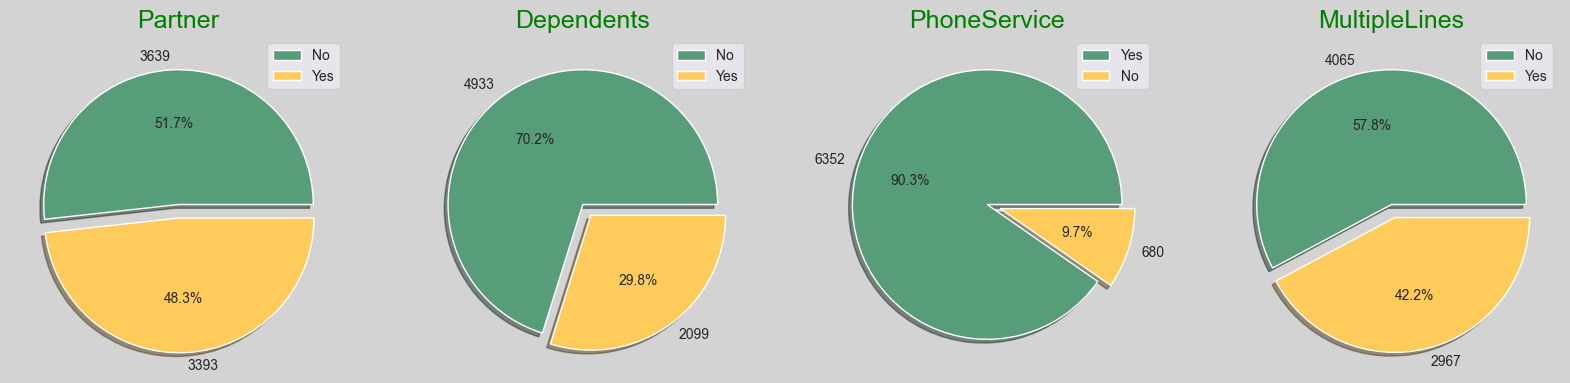

In [17]:
categ_columns = df.select_dtypes("object").columns[1:-1]

fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[:4]):
    ax = axes[i]
    data = df[column].value_counts()
    ax.pie(data, labels=data.values, autopct="%1.1f%%",
           explode=[0, 0.1], shadow=True, colors=['#579D7A', '#FFCC5C'])
    ax.set_title(column, color="green", size=18)
    ax.legend(data.index)


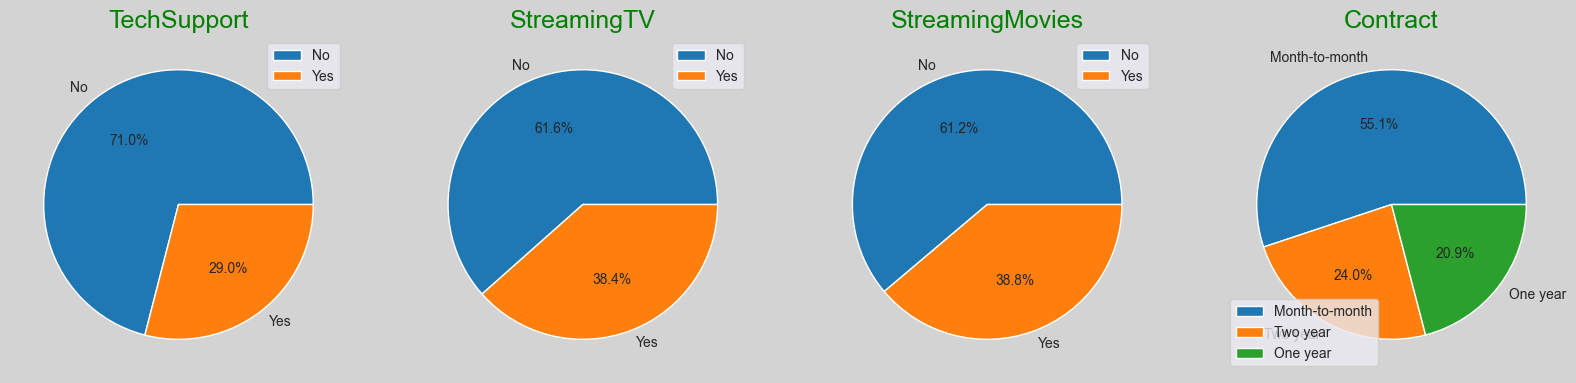

In [18]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[8:12]):
    ax = axes[i]
    data = df[column].value_counts()
    ax.pie(data, labels=data.index, autopct="%1.1f%%", colors=colors)
    ax.set_title(column, color="green", size=18)
    ax.legend(data.index)

plt.show()

In [19]:
categ_columns

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

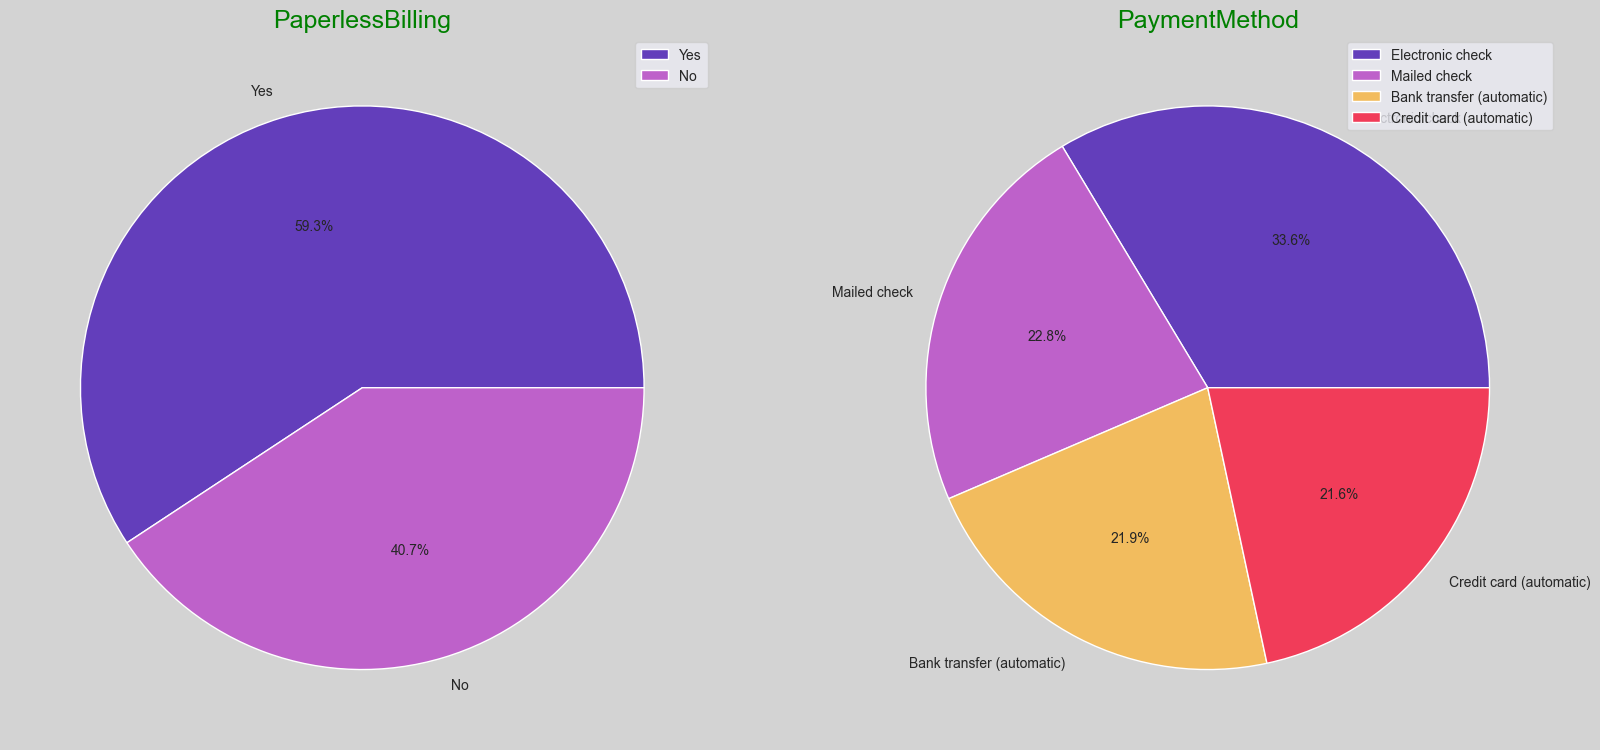

In [20]:
colors = ['#633EBB', '#BE61CA', '#F2BC5E', '#F13C59']

fig, axes = plt.subplots(1, 2, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[12:]):
    ax = axes[i]
    data = df[column].value_counts()
    ax.pie(data, labels=data.index, autopct="%1.1f%%", colors=colors)
    ax.set_title(column, color="green", size=18)
    ax.legend(data.index)

plt.show()

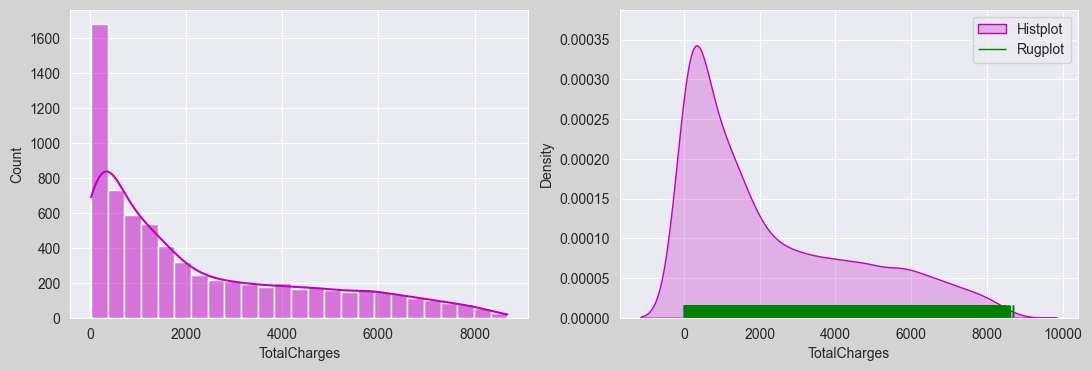

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4), facecolor='lightgray')

sns.histplot(df['TotalCharges'], color='m', ax=ax[0], kde=True)
sns.kdeplot(df['TotalCharges'], fill=True, color='m', ax=ax[1])
sns.rugplot(df['TotalCharges'], height=0.04, color='g', ax=ax[1])
ax[1].legend(['Histplot', 'Rugplot'])
plt.show()

(-1.099997566543586,
 1.0999996259728404,
 -1.0999953926151114,
 1.0999997806007196)

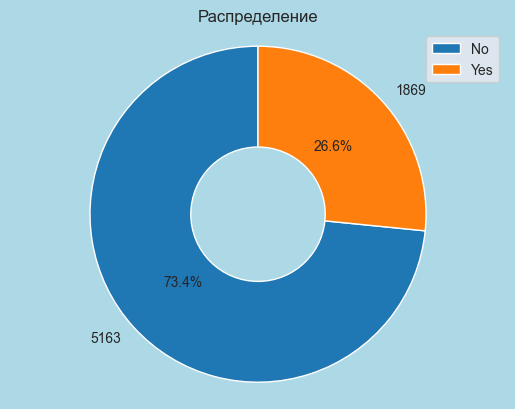

In [29]:
fig, ax = plt.subplots(facecolor="lightblue")
data = df["Churn"].value_counts()
ax.pie(data, autopct='%1.1f%%', startangle=90, labels=data.values)
ax.legend(data.index)
ax.set_title("Распределение")
centre_circle = plt.Circle((0, 0), 0.4, fc='lightblue')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')

<Axes: ylabel='Churn'>

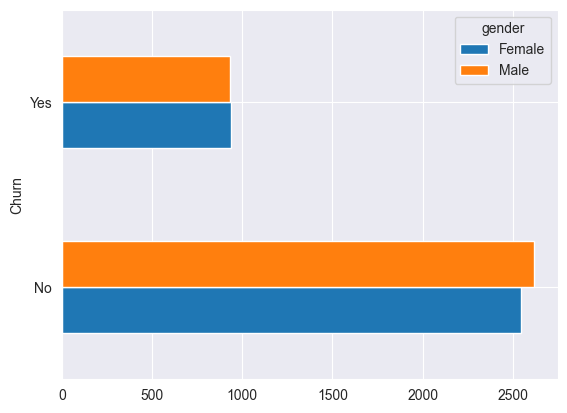

In [23]:
pd.crosstab(df["Churn"], df["gender"]).plot(kind="barh")

[Text(0.5, 0, 'Количество')]

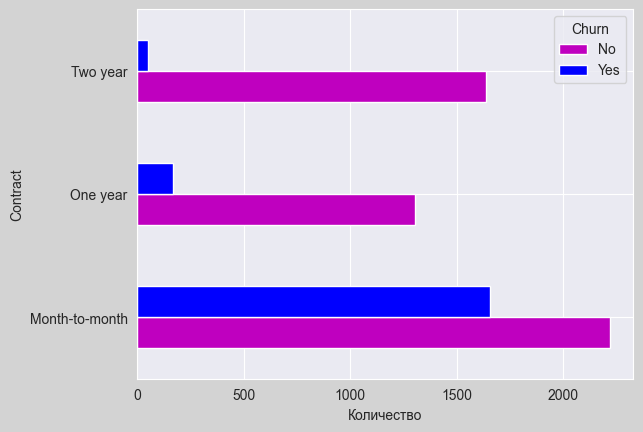

In [27]:
fig, ax = plt.subplots(facecolor="lightgray")
pd.crosstab(df["Contract"], df["Churn"]).plot(kind="barh", color=["m", "b"], ax=ax)
ax.set(xlabel="Количество")

[Text(0.5, 0, 'Количество')]

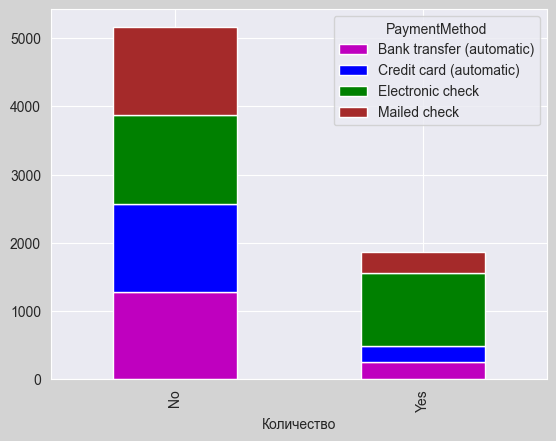

In [28]:
fig, ax = plt.subplots(facecolor="lightgray")
pd.crosstab(df["Churn"], df["PaymentMethod"]).plot(kind="bar", color=["m", "b", "green", "brown"], ax=ax,
                                                   stacked=True, )
ax.set(xlabel="Количество")

Text(0.5, 0.98, 'Распределение')

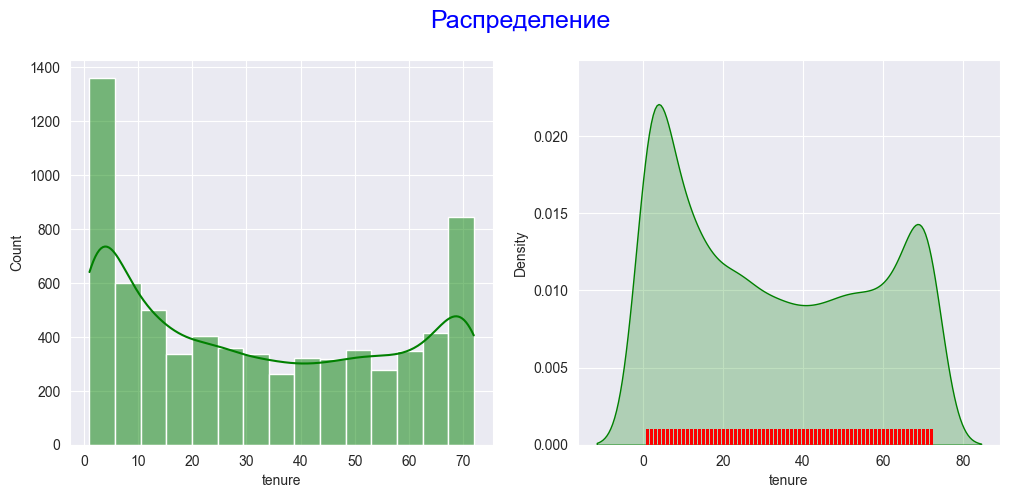

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['tenure'], kde=True, color='g', ax=ax[0])
sns.kdeplot(df['tenure'], color='g', ax=ax[1], fill=True)
sns.rugplot(df['tenure'], color='r', height=0.04)
fig.suptitle("Распределение", color="blue", size=18)

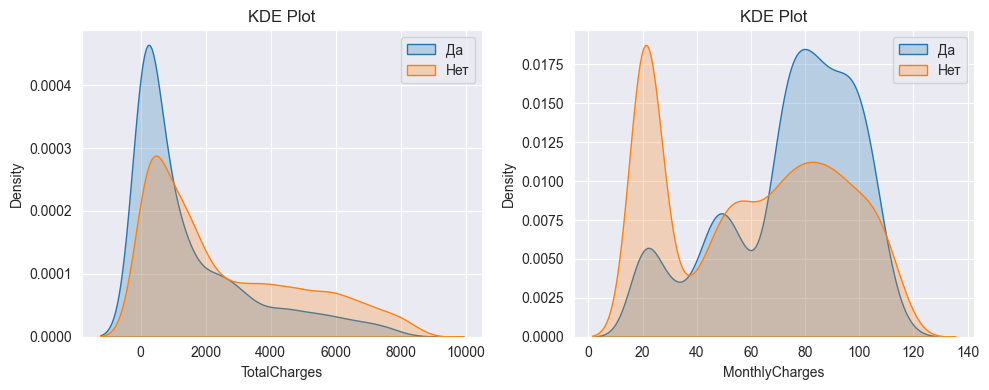

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.kdeplot(df["TotalCharges"][df["Churn"] == "Yes"], fill=True, ax=ax[0])
sns.kdeplot(df["TotalCharges"][df["Churn"] == "No"], fill=True, ax=ax[0])
ax[0].legend(["Да", "Нет"])
ax[0].set_title("KDE Plot");

sns.kdeplot(df["MonthlyCharges"][df["Churn"] == "Yes"], fill=True, ax=ax[1])
sns.kdeplot(df["MonthlyCharges"][df["Churn"] == "No"], fill=True, ax=ax[1])
ax[1].legend(["Да", "Нет"])
ax[1].set_title("KDE Plot")
fig.tight_layout(h_pad=2)

Наблюдается, что клиенты с ежемесячными платежами в диапазоне от 0 до $40 имеют низкий уровень оттока.

In [31]:
categorical = df.select_dtypes('object')

In [32]:
categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [33]:
encoder = OrdinalEncoder().fit(categorical)
encoded = encoder.transform(categorical)

In [34]:
number = df.select_dtypes("number").reset_index(drop=True)

In [35]:
cate = pd.DataFrame(encoded.astype("int64"), columns=categorical.columns).reset_index(drop=True)

In [36]:
df_final = pd.concat([number, cate], axis=1)
df_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [37]:
scaler = StandardScaler()

df_final[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(
    df_final[["tenure", "MonthlyCharges", "TotalCharges"]])

In [38]:
X = df_final.drop("Churn", axis="columns")
Y = df_final["Churn"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5, stratify=Y)

In [40]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

Данные несбалансированы. Для решения этой проблемы мы будем использовать SMOTE.

In [41]:
smote = SMOTE(random_state=0)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [42]:
y_train_res.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [43]:
def parameter_finder(model, parameters, x_train_res, y_train_res, x_test, y_test):
    start = time.time()  # Запускаем счетчик времени.

    grid = GridSearchCV(model,
                        param_grid=parameters,  # Перебираемые параметры модели.
                        refit=True,  # После подбора лучших параметров обучаем на всей выборке.
                        cv=KFold(shuffle=True, random_state=1),  # Кросс-валидация.
                        n_jobs=-1)  # Используем все доступные ядра процессора.
    grid_fit = grid.fit(x_train_res, y_train_res)  # Подгоняем сетку на тренировочных данных.
    best = grid_fit.best_estimator_  # Находим лучшую модель.
    y_pred = best.predict(x_test)  # Предсказываем на тестовых данных.

    train_score = best.score(x_train_res, y_train_res)  # Оценка на тренировочных данных.
    test_score = best.score(x_test, y_test)  # Оценка на тестовых данных.
    F1_score = f1_score(y_test, y_pred).round(2)  # F1-мера на тестовых данных.

    model_name = str(model).split('(')[0]  # Получаем название модели.

    end = time.time()  # Завершаем счетчик времени.
    takes_time = np.round(end - start, 2)  # Вычисляем время работы программы.

    print(f"Лучший параметр для модели {model_name}: {grid_fit.best_params_}")  # Выводим лучшие параметры модели.
    print("-" * 30)
    print(f"R2 на трейне: {train_score:0.2%}. Модель: {model_name}")  # Выводим оценку R2 на тренировочных данных.
    print(f"R2 на тесте: {test_score:0.2%}. Модель: {model_name}")  # Выводим оценку R2 на тестовых данных.
    print(f"F1: {F1_score:,}. Модель: {model_name}")  # Выводим оценку F1.
    print("-" * 30)
    print(f"Время работы программы: {takes_time:0.2f}")  # Выводим время работы программы.

    return best, train_score, test_score, F1_score, y_pred, takes_time  # Возвращаем лучшую модель и результаты оценки.

In [44]:
dt_clf = DecisionTreeClassifier()  # Создаем экземпляр классификатора дерева решений.

param_grid = {  # Задаем сетку параметров для перебора.
    'criterion': ['gini', 'entropy'],  # Критерий для разделения.
    'max_depth': [3, 5],  # Максимальная глубина дерева.
    'min_samples_split': [2, 5, 10],  # Минимальное количество выборок для разделения узла.
    'min_samples_leaf': [1, 2, 4]  # Минимальное количество выборок для листового узла.
}

# Выполняем поиск лучших параметров для модели дерева решений.
# Возвращаем лучшую модель, оценки на тренировочных и тестовых данных,
# F1-меру, предсказания и время работы.
dt_model, train_dt, test_dt, f1_dt, pred_dt, time_dt = parameter_finder(dt_clf, param_grid, x_train_res, y_train_res,
                                                                        x_test, y_test)

Лучший параметр для модели DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
------------------------------
R2 на трейне: 78.87%. Модель: DecisionTreeClassifier
R2 на тесте: 74.56%. Модель: DecisionTreeClassifier
F1: 0.61. Модель: DecisionTreeClassifier
------------------------------
Время работы программы: 5.02


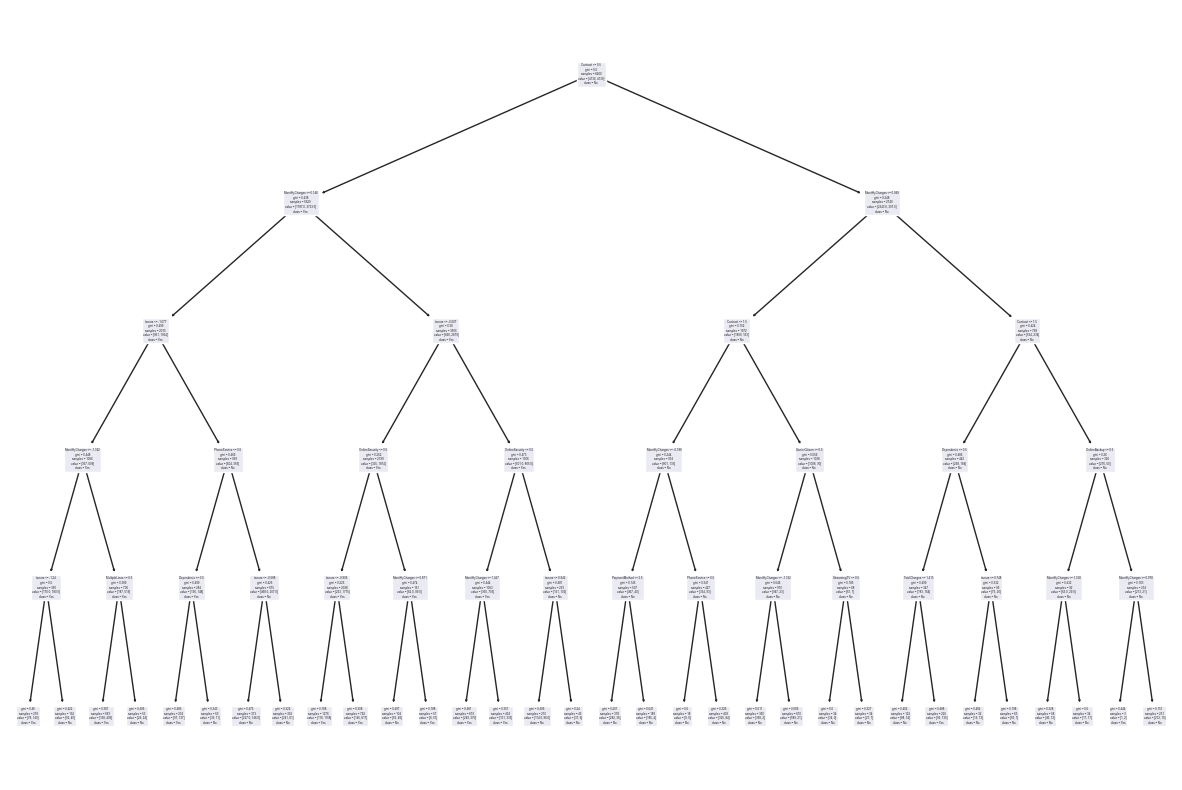

In [45]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [46]:
rf = RandomForestClassifier(verbose=10)  # Создаем экземпляр классификатора случайного леса.

param_grid = {  # Задаем сетку параметров для перебора.
    'criterion': ['gini', 'entropy'],  # Критерий для разделения.
    'n_estimators': [10, 25, 60, 100],  # Количество деревьев в лесу.
    'max_depth': [3, 5, 7, 8],  # Максимальная глубина деревьев.
    'min_samples_split': [2, 5, 10],  # Минимальное количество выборок для разделения узла.
    'min_samples_leaf': [1, 2, 5]  # Минимальное количество выборок для листового узла.
}

# Выполняем поиск лучших параметров для модели случайного леса.
# Возвращаем лучшую модель, оценки на тренировочных и тестовых данных,
# F1-меру, предсказания и время работы.
rf_model, train_rf, test_rf, f1_rf, pred_rf, time_rf = parameter_finder(rf, param_grid, x_train_res, y_train_res,
                                                                        x_test, y_test)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100


[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
Лучший параметр для модели RandomForestClassifier: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
------------------------------
R2 на трейне: 83.55%. Модель: RandomForestClassifier
R2 на тесте: 76.19%. Модель: RandomForestClassifier
F1: 0.62. Модель: RandomForestClassifier
------------------------------
Время работы программы: 38.83


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
